In [88]:
import pandas as pd
import numpy as np

In [89]:
apple = pd.read_csv('Apple_stock.csv') #read data
apple 

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [90]:
apple.dtypes #show data types

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [91]:
apple['Date'] = pd.to_datetime(apple.Date) #datetime 
apple.set_index('Date', inplace=True, drop=False)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


In [92]:
apple.index.duplicated().sum() #repeated dates check

0

In [93]:
apple.sort_index(inplace=True)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [94]:
apple['month'] =  [str(i[0])+'-'+str(i[1]) for i in np.column_stack([apple.index.year,apple.index.month])] #extract each month
apple.set_index('month', inplace=True) #set index by month
final_business_day = pd.DataFrame([(apple.loc[i].iloc[len(apple.loc[i])-1]) for i in set(apple.index)]) #for each month extract its last record
final_business_day.sort_index(inplace=True) #display
final_business_day

,Date,Open,High,Low,Close,Volume,Adj Close
1980-12,1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-1,1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-10,1981-10-30,20.00,20.13,20.00,20.00,13182400,0.31
1981-11,1981-11-30,18.75,18.75,18.63,18.63,5992000,0.29
1981-12,1981-12-31,22.13,22.25,22.13,22.13,13664000,0.34
...,...,...,...,...,...,...,...
2014-3,2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-4,2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-5,2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43
2014-6,2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93


In [95]:
apple.Date.max()-apple.Date.min() #calculate timedelta of latest and earliest

Timedelta('12261 days 00:00:00')

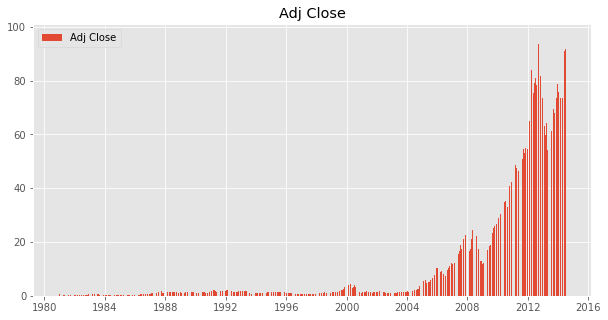

In [102]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
plt.title('Adj Close')
plt.bar(x=apple.Date, height=apple['Adj Close'],label='Adj Close')
plt.legend(loc='upper left')